<a href="https://colab.research.google.com/github/sugarghost/hanghae99_AI_PLUS_2/blob/main/1_4_HOMEWORK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


## [MY CODE] Test data 준비하기

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [2]:
transform = transforms.ToTensor()

batch_size = 256

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testset = torchvision.datasets.MNIST(
    root='./data',
    train=False, # 테스트 데이터는 학습시키지 않음
    download=True,
    transform=transform
)


testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False # 테스트 데이터는 섞을 필요 없음
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.73MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [3]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x


model = Model(28 * 28 * 1, 1024)

## [MY CODE] nn.CrossEntropyLoss 방식 추가

In [4]:
from torch.optim import SGD

lr = 0.001
model = model.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=lr)

## [MY CODE] 제공된 측정 함수 추가

In [5]:
import numpy as np
import matplotlib.pyplot as plt

train_accs, test_accs = [], []
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

## [MY CODE] 기존 MSE 방식 대신 CrossEntropyLoss 방식 적용

## [MY CODE] 제공된 Train/Test 비교 함수를 Epoch별로 적용

## [LOG] 학습 과정에서의 Epoch별 손실값 및 정확도 출력

In [6]:
n_epochs = 100
for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    # MSE 방식 비활성화
    # loss = (preds[:, 0] - labels).pow(2).mean()
    loss = criterion(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  # Epoch별 Train/Test 정확도 계산
  train_acc = accuracy(model, trainloader)
  test_acc = accuracy(model, testloader)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

  print(f"Epoch {epoch:3d} | Loss: {total_loss} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

Epoch   0 | Loss: 540.5306172370911 | Train Acc: 0.1682 | Test Acc: 0.1770
Epoch   1 | Loss: 538.7212462425232 | Train Acc: 0.2564 | Test Acc: 0.2754
Epoch   2 | Loss: 536.6758522987366 | Train Acc: 0.3352 | Test Acc: 0.3454
Epoch   3 | Loss: 534.3459541797638 | Train Acc: 0.3845 | Test Acc: 0.3926
Epoch   4 | Loss: 531.6179668903351 | Train Acc: 0.4178 | Test Acc: 0.4226
Epoch   5 | Loss: 528.4994027614594 | Train Acc: 0.4530 | Test Acc: 0.4587
Epoch   6 | Loss: 525.215279340744 | Train Acc: 0.4818 | Test Acc: 0.4894
Epoch   7 | Loss: 521.6532361507416 | Train Acc: 0.5034 | Test Acc: 0.5081
Epoch   8 | Loss: 517.689713716507 | Train Acc: 0.5169 | Test Acc: 0.5215
Epoch   9 | Loss: 513.2463309764862 | Train Acc: 0.5260 | Test Acc: 0.5313
Epoch  10 | Loss: 508.2957773208618 | Train Acc: 0.5334 | Test Acc: 0.5379
Epoch  11 | Loss: 502.7475514411926 | Train Acc: 0.5384 | Test Acc: 0.5424
Epoch  12 | Loss: 496.4270179271698 | Train Acc: 0.5422 | Test Acc: 0.5454
Epoch  13 | Loss: 489.40809

## [MY CODE] 결과 테스트를 위한 출력

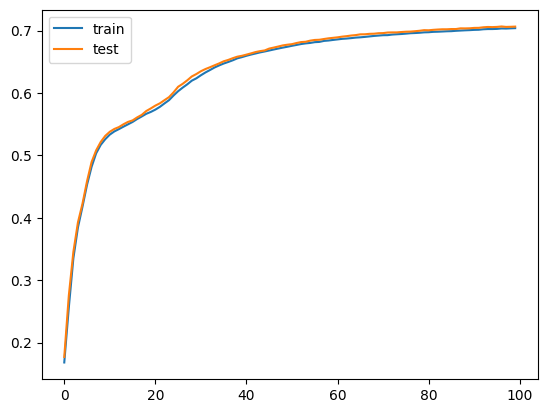

In [8]:
plot_acc(train_accs, test_accs)
